In [1]:
import numpy as np
import sys
import matplotlib.pyplot as plt
sys.path.append("../../")
import cmcrameri
from matplotlib.colors import LogNorm
import scienceplots
from uq import GaussianUQMeasure
from models import NormalCRPS, SquaredError, GaussianKernelScore, NLL
import torch
import matplotlib as mpl
from matplotlib import gridspec

# Analyze task adaptive loss

In [14]:
measures = measures = ["log", "var", "crps", "kernel"]
losses = ["log", "se","crps", "kernel"]
gamma = 1.0
names = [r"$S_\mathrm{log}$",r"$S_\mathrm{SE}$",r"$S_\mathrm{ES}$",r"$S_{k_\gamma}$"]

loss_dict = {
    "crps": NormalCRPS(reduction=None),
    "log": NLL(reduction=None),
    "se": SquaredError(reduction=None),
    "kernel": GaussianKernelScore(reduction=None, gamma=gamma),
}

targets = torch.tensor(np.load("../../results/active_learning/targets.npy"))

In [15]:
def movingaverage(interval, window_size):
    window= np.ones(int(window_size))/float(window_size)
    return np.convolve(interval, window, 'same')

In [16]:
plt.style.use(['science', 'grid'])
labelsize = 22
ticksize = 20
legendsize = 24

cmap = plt.get_cmap('cmc.roma_r')
colors = [cmap(x) for x in np.linspace(0,0.95,4)]

# TU

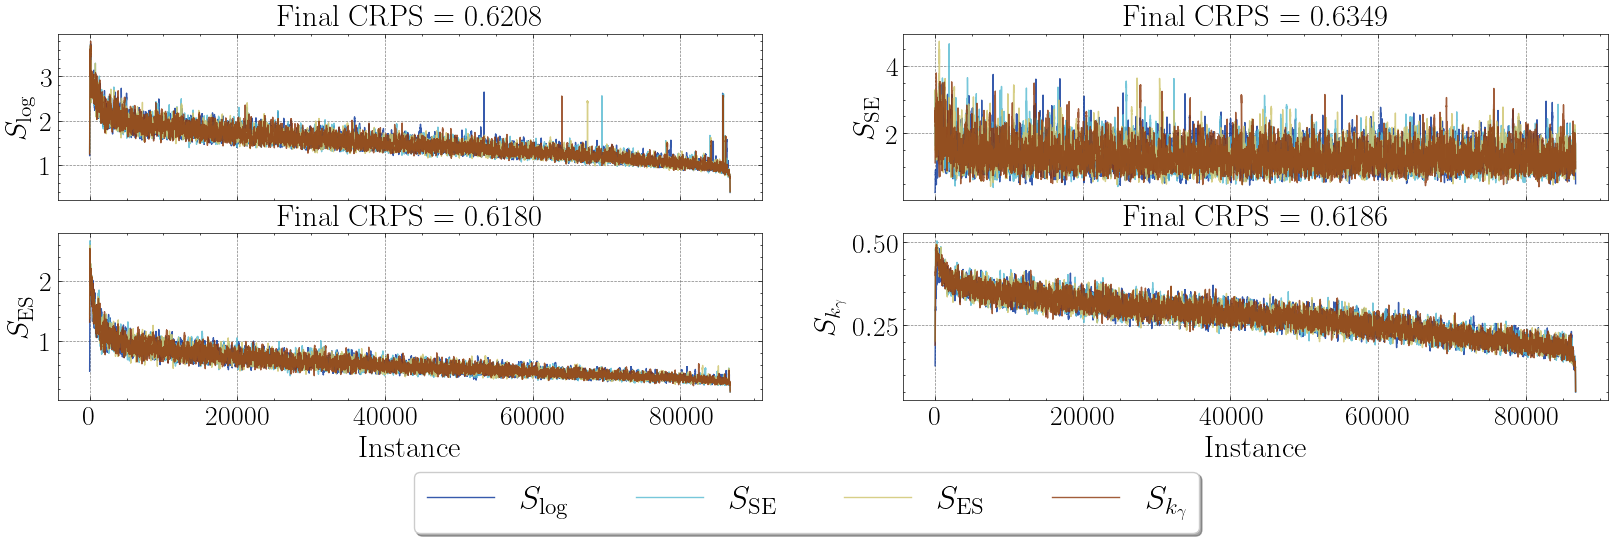

In [17]:
fig, axs = plt.subplots(2,2, figsize = (20,6), sharex = True)
axs = axs.ravel()
handles = []

for i,metric in enumerate(losses):
    result = np.load(f"../../results/active_learning/{metric}/pred.npy")
    result_tensor = torch.permute(torch.tensor(result), (1,2,0))
    result_tensor[:,0] = result_tensor[:,0]
    task_loss = np.load(f"../../results/active_learning/{metric}/{metric}.npy")

    mu = result_tensor[:,0:1].mean(dim = -1)
    sigma = torch.sqrt(result_tensor[:,1:2].mean(dim = -1) + torch.var(result_tensor[:,0:1], dim = -1))
    pred = torch.cat([mu, sigma], dim = 1)

    crps = NormalCRPS(reduction = "mean")(pred, targets.unsqueeze(1))
    for m,measure in enumerate(measures):
        au, eu, tu = GaussianUQMeasure(result_tensor, gamma = gamma).get_uncertainties(measure)
        indices = torch.argsort(tu, descending = True)
        im, = axs[i].plot(movingaverage(task_loss[indices][:,0],50), label = names[m], alpha = 0.8, color = colors[m])
        handles.append(im)

    axs[i].set_ylabel(names[i], fontsize = labelsize)
    axs[i].xaxis.set_tick_params(labelsize=ticksize)
    axs[i].yaxis.set_tick_params(labelsize=ticksize)
    axs[i].set_title(f"Final CRPS = {crps:.4f}",fontsize = labelsize)

axs[2].set_xlabel("Instance", fontsize = labelsize)
axs[3].set_xlabel("Instance", fontsize = labelsize)

# axs.legend(loc='upper center', bbox_to_anchor=(0.5, -0.23),
#         fancybox=True, shadow=True, ncol=4, fontsize = legendsize)

# Legend
fig.subplots_adjust(bottom=0.27)
fig.legend(labels = names, handles = handles[0:4], loc='lower center', ncol = 4, fontsize = legendsize, fancybox = True, shadow = True)

plt.savefig("../../plots/task_adaption_tu.pdf", bbox_inches = "tight")

# EU

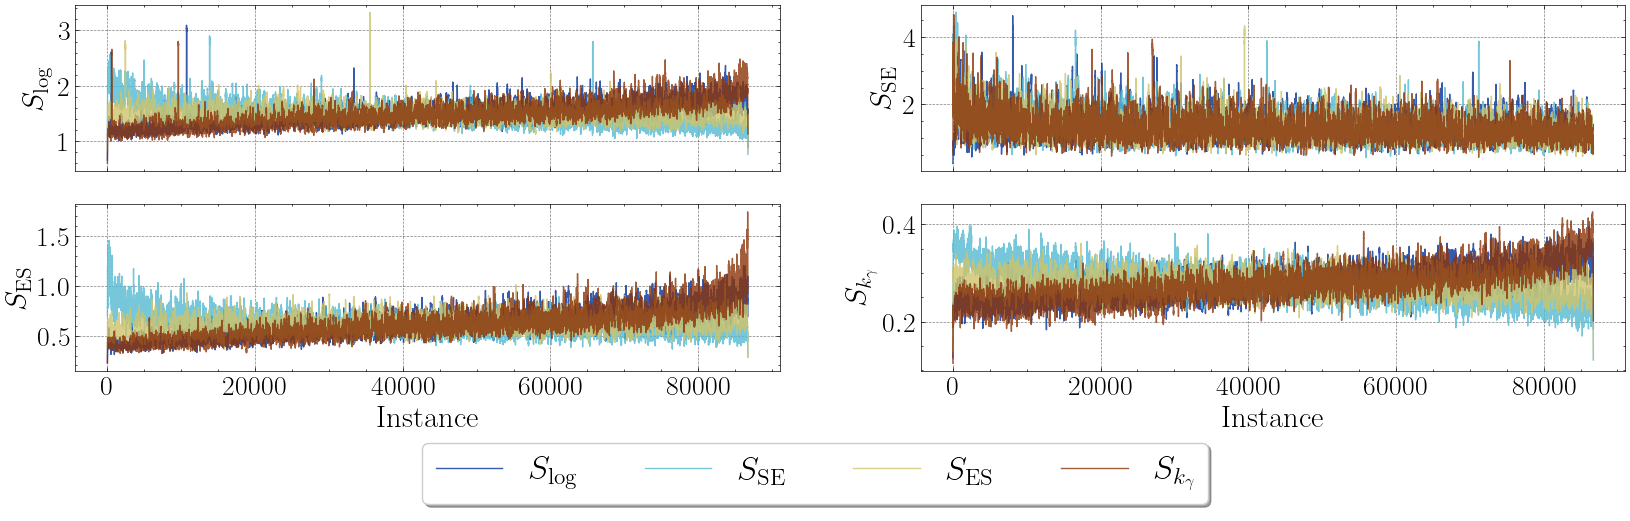

In [18]:
fig, axs = plt.subplots(2,2, figsize = (20,6), sharex = True)
axs = axs.ravel()
handles = []

for i,metric in enumerate(losses):
    result = np.load(f"../../results/active_learning/{metric}/pred.npy")
    result_tensor = torch.permute(torch.tensor(result), (1,2,0))
    result_tensor[:,0] = result_tensor[:,0]
    task_loss = np.load(f"../../results/active_learning/{metric}/{metric}.npy")

    mu = result_tensor[:,0:1].mean(dim = -1)
    sigma = torch.sqrt(result_tensor[:,1:2].mean(dim = -1) + torch.var(result_tensor[:,0:1], dim = -1))
    pred = torch.cat([mu, sigma], dim = 1)
    for m,measure in enumerate(measures):
        au, eu, tu = GaussianUQMeasure(result_tensor, gamma = gamma).get_uncertainties(measure)
        indices = torch.argsort(eu, descending = True)
        im, = axs[i].plot(movingaverage(task_loss[indices][:,0],50), label = names[m], alpha = 0.8, color = colors[m])
        handles.append(im)

    axs[i].set_ylabel(names[i], fontsize = labelsize)
    axs[i].xaxis.set_tick_params(labelsize=ticksize)
    axs[i].yaxis.set_tick_params(labelsize=ticksize)

axs[2].set_xlabel("Instance", fontsize = labelsize)
axs[3].set_xlabel("Instance", fontsize = labelsize)

# axs.legend(loc='upper center', bbox_to_anchor=(0.5, -0.23),
#         fancybox=True, shadow=True, ncol=4, fontsize = legendsize)

# Legend
fig.subplots_adjust(bottom=0.27)
fig.legend(labels = names, handles = handles[0:4], loc='lower center', ncol = 4, fontsize = legendsize, fancybox = True, shadow = True)

plt.savefig("../../plots/task_adaption_eu.pdf", bbox_inches = "tight")

# AU

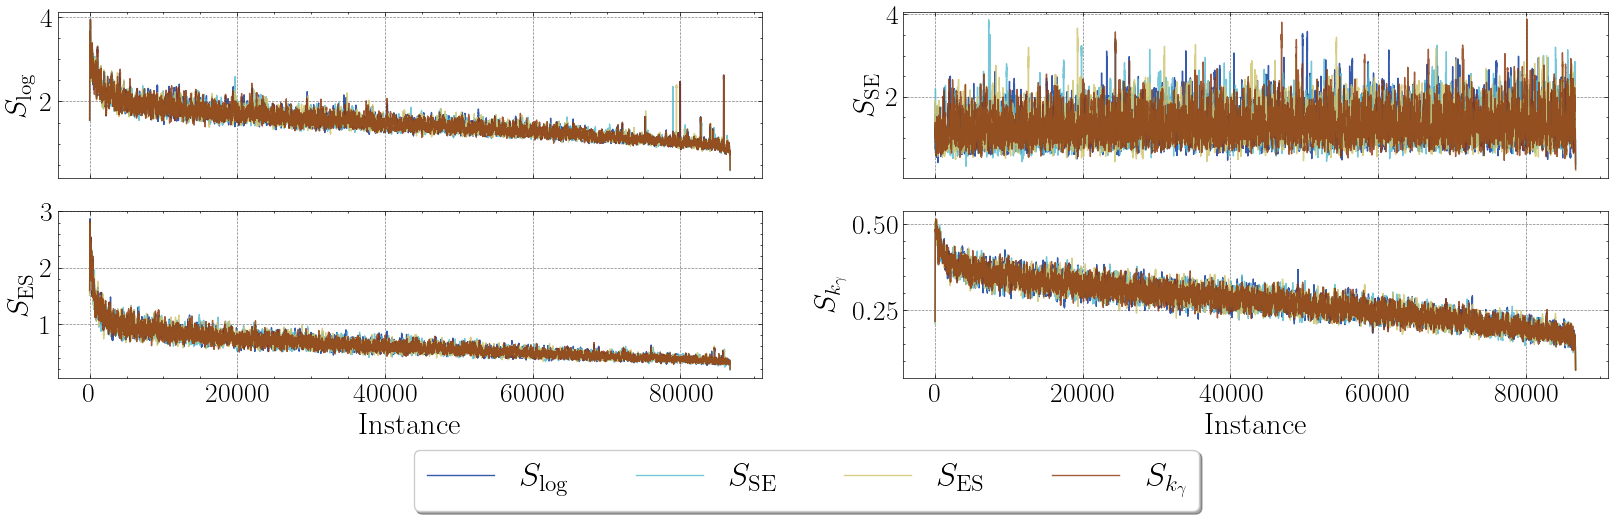

In [19]:
fig, axs = plt.subplots(2,2, figsize = (20,6), sharex = True)
axs = axs.ravel()
handles = []

for i,metric in enumerate(losses):
    result = np.load(f"../../results/active_learning/{metric}/pred.npy")
    result_tensor = torch.permute(torch.tensor(result), (1,2,0))
    result_tensor[:,0] = result_tensor[:,0]
    task_loss = np.load(f"../../results/active_learning/{metric}/{metric}.npy")

    mu = result_tensor[:,0:1].mean(dim = -1)
    sigma = torch.sqrt(result_tensor[:,1:2].mean(dim = -1) + torch.var(result_tensor[:,0:1], dim = -1))
    pred = torch.cat([mu, sigma], dim = 1)
    for m,measure in enumerate(measures):
        au, eu, tu = GaussianUQMeasure(result_tensor, gamma = gamma).get_uncertainties(measure)
        indices = torch.argsort(au, descending = True)
        im, = axs[i].plot(movingaverage(task_loss[indices][:,0],50), label = names[m], alpha = 0.8, color = colors[m])
        handles.append(im)

    axs[i].set_ylabel(names[i], fontsize = labelsize)
    axs[i].xaxis.set_tick_params(labelsize=ticksize)
    axs[i].yaxis.set_tick_params(labelsize=ticksize)

axs[2].set_xlabel("Instance", fontsize = labelsize)
axs[3].set_xlabel("Instance", fontsize = labelsize)

# axs.legend(loc='upper center', bbox_to_anchor=(0.5, -0.23),
#         fancybox=True, shadow=True, ncol=4, fontsize = legendsize)

# Legend
fig.subplots_adjust(bottom=0.27)
fig.legend(labels = names, handles = handles[0:4], loc='lower center', ncol = 4, fontsize = legendsize, fancybox = True, shadow = True)

plt.savefig("../../plots/task_adaption_au.pdf", bbox_inches = "tight")

# Kernel tuning

In [20]:
plt.style.use(['science', 'grid'])
cmap = plt.get_cmap('cmc.roma_r')
labelsize = 27
ticksize = 22
legendsize = 24
lw = 1.8

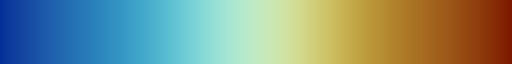

In [21]:
cmap

In [22]:
gamma = np.arange(0.1,2.1,0.1)
inst = np.arange(200, 41*200,200)
colors = [cmap(x) for x in np.linspace(0,1,len(gamma))]

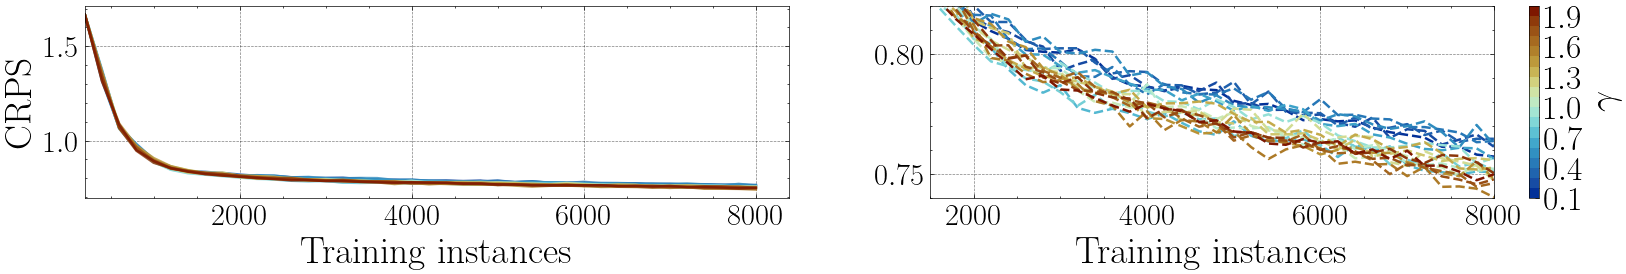

In [35]:
fig = plt.figure(figsize = (20,2.5))
gs = gridspec.GridSpec(1, 2, width_ratios=[1, 1]) 
axs = plt.subplot(gs[0])
for i,m in enumerate(gamma):
    method = np.load(f"../../results/active_learning/kernel_tuning/results/kernel_{m:.1f}.npy").mean(axis = 0)
    mean = method[:,0]
    axs.plot(inst, mean, label = rf"$\gamma=${m}", lw = lw, alpha = 0.8, color = colors[i])
    #axs.fill_between(inst, mean-std, mean+std, alpha=0.1)
axs.xaxis.set_tick_params(labelsize=ticksize)
axs.yaxis.set_tick_params(labelsize=ticksize)
axs.set_xlabel("Training instances", size = labelsize)
axs.set_ylabel("CRPS", size = labelsize)
#axs.set_ylim([0.73,1.52])
axs.set_xlim([200,None])
#plt.legend(fontsize = legendsize, fancybox = True, shadow = True, frameon = True)
#plt.savefig("../../plots/kernel_tuning.pdf", bbox_inches = "tight")


axs = plt.subplot(gs[1])
for i,m in enumerate(gamma):
    method = np.load(f"../../results/active_learning/kernel_tuning/results/kernel_{m:.1f}.npy").mean(axis = 0)
    mean = method[:,0]
    axs.plot(inst, mean, label = rf"$\gamma=${m}", lw = lw, alpha = 1, color = colors[i], linestyle = "--")
    #axs.fill_between(inst, mean-std, mean+std, alpha=0.1)
axs.xaxis.set_tick_params(labelsize=ticksize)
axs.yaxis.set_tick_params(labelsize=ticksize)
axs.set_xlabel("Training instances", size = labelsize)
#axs.set_ylabel("CRPS", size = labelsize)
axs.set_ylim([0.74,0.82])
axs.set_xlim([1500,8000])
#plt.legend(fontsize = legendsize, fancybox = True, shadow = True, frameon = True)
norm = mpl.colors.BoundaryNorm(gamma, cmap.N)
cb = fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap),
             ax=axs, orientation='vertical', label=r"$\gamma$")
cb.ax.tick_params(labelsize = legendsize)
cb.set_ticks(np.linspace(0.1,1.9, 7))
cb.set_label(r"$\gamma$",size=labelsize)
plt.savefig("../../plots/kernel_tuning.pdf", bbox_inches = "tight")